In [90]:
### 필요 라이브러리 ###
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
import os
import cv2
import mnist #이미지불러오기 가능
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.models import Sequential # 순차적으로 쌓겠다
from tensorflow.keras.utils import to_categorical

In [91]:
### 실제이미지를 for문으로 특정폴더 이미지를 list에다가 하나씩 저장한다.

### 데이터 불러오기

In [110]:
TRAIN_DIR = 'Car_Brand_Logos/Train'
TEST_DIR = 'Car_Brand_Logos/Test'

In [113]:
train_folder_list = os.listdir(TRAIN_DIR)
test_folder_list = os.listdir(TEST_DIR)

In [98]:
IMG_SIZE = 48
train_images=[]
train_labels=[]

for index in range(0,len(train_folder_list)):
    path = os.path.join(TRAIN_DIR,train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path,img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            train_images.append(new_img)
            train_labels.append(index)
        except:
            pass

In [114]:
IMG_SIZE = 48
test_images=[]
test_labels=[]

for index in range(0,len(test_folder_list)):
    path = os.path.join(TEST_DIR,test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path,img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            test_images.append(new_img)
            test_labels.append(index)
        except:
            pass

In [115]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [117]:
print(train_images.shape)  #48, 48 픽셀(해상도)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(2513, 48, 48)
(2513,)
(400, 48, 48)
(400,)


In [119]:
eachImg = pd.DataFrame( train_images[2] )

In [121]:
eachImg.to_csv("F:/eachImg.csv") # 해당 csv파일에서 특징들을 추출(rgb의 값)

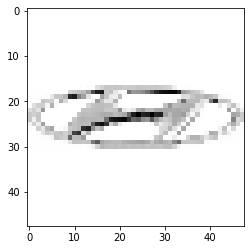

In [126]:
plt.imshow(eachImg,cmap="gray")

In [139]:
# 이미지 정규화(255로 나눠주면 0~1사이의 값으로 나눈다)

In [129]:
train_images = (train_images/255)
test_images = (test_images/255)

In [138]:
#train_images = train_images.reshape((len(train_images),48,48))

In [137]:
print(train_images.shape)

(2513, 48, 48)


In [141]:
## 각각의 값을 하나의 숫자로 나누고 싶을때는 array로 형변환해서 나눠준다(np.array)

In [143]:
# np.array([1,2,3,4]) / 2
# 답: array([0.5, 1. , 1.5, 2. ])
# [1,2,3,4])/2 답 = 오류

In [151]:
train_labels_one_hot = to_categorical(train_labels)

In [153]:
train_labels_one_hot[2]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)